In [70]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [71]:
import matplotlib.pyplot as plt

In [72]:
data_train = pd.read_csv("SalaryData_Train(1).csv")
data_test = pd.read_csv("SalaryData_Test(1).csv")

In [73]:
data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [74]:
data_train.shape

(30161, 14)

In [75]:
data_test.shape

(15060, 14)

In [76]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [77]:
data_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [78]:
data_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [79]:
data_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [80]:
# converting the data to numeric by labelling them

In [81]:
# columns
columns_name = ['workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary']

In [82]:
from sklearn.preprocessing import LabelEncoder

In [83]:
LE = LabelEncoder()

In [84]:
for i in columns_name:
    data_train[i] = LE.fit_transform(data_train[i])
    data_test[i] = LE.fit_transform(data_test[i])

In [85]:
data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,12,4,0,1,4,1,24,0,39,37,0
1,50,4,9,12,2,3,0,4,1,0,0,12,37,0
2,38,2,11,8,0,5,1,4,1,0,0,39,37,0
3,53,2,1,6,2,5,0,2,1,0,0,39,37,0
4,28,2,9,12,2,9,5,2,0,0,0,39,4,0


In [86]:
data_train.shape

(30161, 14)

In [87]:
import seaborn as sns

<AxesSubplot:>

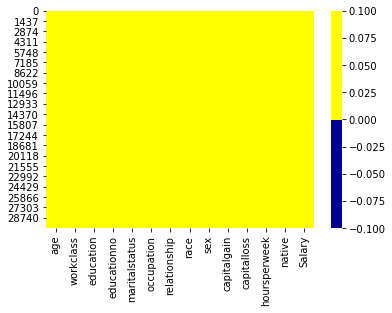

In [88]:
cols = data_train.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data_train[cols].isnull(),
            cmap=sns.color_palette(colours))

In [89]:
# Data has no null values or missing values

In [90]:
# normalizing the data

In [91]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [92]:
def norm_func(i):
    x = ( i - i.min()) / ( i.max() - i.min())
    return(x)

In [93]:
train_norm = norm_func(data_train)

In [94]:
train_norm.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0.301370,0.833333,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.205128,0.0,0.419355,0.948718,0.0
1,0.452055,0.666667,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.129032,0.948718,0.0
2,0.287671,0.333333,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.000000,0.0,0.419355,0.948718,0.0
3,0.493151,0.333333,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.000000,0.0,0.419355,0.948718,0.0
4,0.150685,0.333333,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.000000,0.0,0.419355,0.102564,0.0


In [95]:
train_norm = norm_func(data_train)

In [96]:
test_norm = norm_func(data_test)

In [97]:
train_norm

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0.301370,0.833333,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.205128,0.0,0.419355,0.948718,0.0
1,0.452055,0.666667,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.129032,0.948718,0.0
2,0.287671,0.333333,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.000000,0.0,0.419355,0.948718,0.0
3,0.493151,0.333333,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.000000,0.0,0.419355,0.948718,0.0
4,0.150685,0.333333,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.000000,0.0,0.419355,0.102564,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,0.136986,0.333333,0.466667,0.733333,0.333333,0.923077,1.0,1.0,0.0,0.000000,0.0,0.397849,0.948718,0.0
30157,0.315068,0.333333,0.733333,0.533333,0.333333,0.461538,0.0,1.0,1.0,0.000000,0.0,0.419355,0.948718,1.0
30158,0.561644,0.333333,0.733333,0.533333,1.000000,0.000000,0.8,1.0,0.0,0.000000,0.0,0.419355,0.948718,0.0
30159,0.068493,0.333333,0.733333,0.533333,0.666667,0.000000,0.6,1.0,1.0,0.000000,0.0,0.204301,0.948718,0.0


In [98]:
test_norm

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0.109589,0.333333,0.066667,0.400000,0.666667,0.461538,0.6,0.50,1.0,0.000000,0.0,0.443182,0.948718,0.0
1,0.287671,0.333333,0.733333,0.533333,0.333333,0.307692,0.0,1.00,1.0,0.000000,0.0,0.556818,0.948718,0.0
2,0.150685,0.166667,0.466667,0.733333,0.333333,0.769231,0.0,1.00,1.0,0.000000,0.0,0.443182,0.948718,1.0
3,0.369863,0.333333,1.000000,0.600000,0.333333,0.461538,0.0,0.50,1.0,0.798165,0.0,0.443182,0.948718,1.0
4,0.232877,0.333333,0.000000,0.333333,0.666667,0.538462,0.2,1.00,1.0,0.000000,0.0,0.329545,0.948718,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.219178,0.333333,0.600000,0.800000,0.666667,0.692308,0.6,1.00,1.0,0.000000,0.0,0.443182,0.948718,0.0
15056,0.301370,0.333333,0.600000,0.800000,0.000000,0.692308,0.2,1.00,0.0,0.000000,0.0,0.397727,0.948718,0.0
15057,0.287671,0.333333,0.600000,0.800000,0.333333,0.692308,0.0,1.00,1.0,0.000000,0.0,0.556818,0.948718,0.0
15058,0.369863,0.333333,0.600000,0.800000,0.000000,0.000000,0.6,0.25,1.0,0.669725,0.0,0.443182,0.948718,0.0


In [99]:
# feature selection

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
x_train = train_norm.iloc[:,0:13]
y_train = train_norm.iloc[:,13]

In [102]:
x_test = test_norm.iloc[:,0:13]
y_test = test_norm.iloc[:,13]

In [103]:
x_train.shape,y_train.shape

((30161, 13), (30161,))

In [104]:
x_test.shape,y_test.shape

((15060, 13), (15060,))

In [105]:
# Model Building

In [106]:
dt_model= DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
dt_model.feature_importances_

array([0.17383242, 0.05023105, 0.01560059, 0.13116247, 0.01130903,
       0.08312462, 0.22000588, 0.02092397, 0.00678516, 0.12676623,
       0.04158797, 0.09914771, 0.01952289])

In [107]:
total = np.cumsum(dt_model.feature_importances_)
total

array([0.17383242, 0.22406347, 0.23966405, 0.37082652, 0.38213555,
       0.46526018, 0.68526606, 0.70619003, 0.71297519, 0.83974143,
       0.8813294 , 0.98047711, 1.        ])

In [108]:
l= dt_model.feature_importances_>0.1
l

array([ True, False, False,  True, False, False,  True, False, False,
        True, False, False, False])

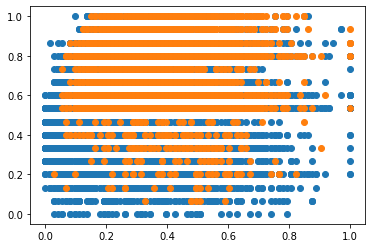

In [109]:
plt.scatter(train_norm['age'].loc[train_norm.Salary==0], train_norm['educationno'].loc[train_norm.Salary==0])
plt.scatter(train_norm['age'].loc[train_norm.Salary==1],train_norm['educationno'].loc[train_norm.Salary==1])
plt.show()

In [110]:
#svm using whole features:

In [111]:
from sklearn.svm import SVC
svm= SVC(kernel='rbf',random_state=0,gamma=0.1,C=1.0)
svm.fit(x_train,y_train)

SVC(gamma=0.1, random_state=0)

In [112]:
# Testing model

In [113]:
# spliting testing Data:

In [114]:
x_test= test_norm.iloc[:,:13]
y_test= test_norm.iloc[:,13]

In [115]:
y_predict = svm.predict(x_test)

In [116]:
np.mean(y_test==y_predict)

0.8335989375830013

In [117]:
# accuracy is 83%